In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from matplotlib import style
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sb
import warnings
from sklearn.datasets import load_iris
from icecream import ic

In [151]:
warnings.filterwarnings("ignore")

## Let's do ETL:

In [152]:
df = pd.read_csv("Assets/Titanic_Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [153]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [154]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [155]:
df.drop(columns=["Cabin"], inplace=True) #drop columns which have null values as it will create issues in prediction
ic(df)

ic| df:      PassengerId  Survived  Pclass  \
        0              1         0       3   
        1              2         1       1   
        2              3         1       3   
        3              4         1       1   
        4              5         0       3   
        ..           ...       ...     ...   
        886          887         0       2   
        887          888         1       1   
        888          889         0       3   
        889          890         1       1   
        890          891         0       3   
        
                                                          Name     Sex   Age  SibSp  \
        0                              Braund, Mr. Owen Harris    male  22.0      1   
        1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
        2                               Heikkinen, Miss. Laina  female  26.0      0   
        3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [157]:
# Forward fill the 'Score' column
df['Embarked'] = df['Embarked'].ffill()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [158]:
df["Age"].mean()

29.69911764705882

In [52]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S


In [148]:
x_cols = ["PassengerId","Pclass","Sex","SibSp","Parch","Ticket","Fare","Embarked","Age"] 

In [149]:
X = df[x_cols]
X.head()  #These are features which we will use 

KeyError: "['Age'] not in index"

In [93]:
label_encoder = LabelEncoder()
X['Sex'] = label_encoder.fit_transform(X['Sex']).astype(float)

In [94]:
X.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,1.0,1,0,A/5 21171,7.2500,S
1,2,1,0.0,1,0,PC 17599,71.2833,C
2,3,3,0.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,0.0,1,0,113803,53.1000,S
4,5,3,1.0,0,0,373450,8.0500,S


In [95]:
X['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [96]:
X['Embarked'] = label_encoder.fit_transform(X["Embarked"]).astype(float)

In [97]:
X.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,1.0,1,0,A/5 21171,7.2500,2.0
1,2,1,0.0,1,0,PC 17599,71.2833,0.0
2,3,3,0.0,0,0,STON/O2. 3101282,7.9250,2.0
3,4,1,0.0,1,0,113803,53.1000,2.0
4,5,3,1.0,0,0,373450,8.0500,2.0


In [98]:
X = X.drop("Ticket",axis = 1)

In [99]:
X

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,1,3,1.0,1,0,7.2500,2.0
1,2,1,0.0,1,0,71.2833,0.0
2,3,3,0.0,0,0,7.9250,2.0
3,4,1,0.0,1,0,53.1000,2.0
4,5,3,1.0,0,0,8.0500,2.0
...,...,...,...,...,...,...,...
886,887,2,1.0,0,0,13.0000,2.0
887,888,1,0.0,0,0,30.0000,2.0
888,889,3,0.0,1,2,23.4500,2.0
889,890,1,1.0,0,0,30.0000,0.0


### Let's Split the data in features and target:

In [100]:
correlation_matrix = X[["PassengerId","Pclass","Sex","SibSp","Parch","Fare","Embarked"]].corr()
correlation_matrix

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.035144,0.042939,-0.057527,-0.001652,0.012658,0.015216
Pclass,-0.035144,1.000000,0.131900,0.083081,0.018443,-0.549500,0.168430
Sex,0.042939,0.131900,1.000000,-0.114631,-0.245489,-0.182333,0.113807
SibSp,-0.057527,0.083081,-0.114631,1.000000,0.414838,0.159651,0.070111
Parch,-0.001652,0.018443,-0.245489,0.414838,1.000000,0.216225,0.041732
Fare,0.012658,-0.549500,-0.182333,0.159651,0.216225,1.000000,-0.228364
Embarked,0.015216,0.168430,0.113807,0.070111,0.041732,-0.228364,1.000000


In [101]:
correlation_matrix_2d = correlation_matrix.values

In [102]:
correlation_matrix_2d.shape

(7, 7)

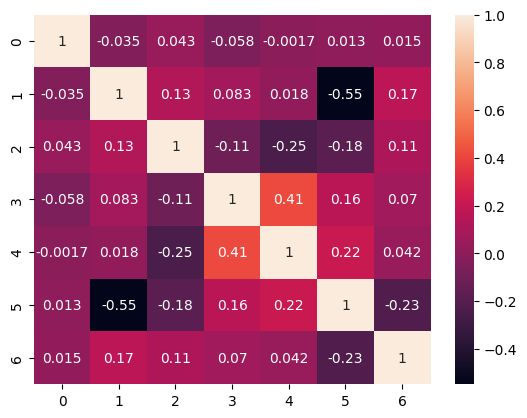

In [103]:
sb.heatmap(correlation_matrix_2d, annot= True)
plt.show()

In [73]:
X = X.drop(columns=["Pclass","SibSp","Parch"], axis=1)

In [104]:
X.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,1,3,1.0,1,0,7.2500,2.0
1,2,1,0.0,1,0,71.2833,0.0
2,3,3,0.0,0,0,7.9250,2.0
3,4,1,0.0,1,0,53.1000,2.0
4,5,3,1.0,0,0,8.0500,2.0


In [117]:
standard_scaler = StandardScaler()
standard_scaler.fit_transform(X)

array([[-1.73010796,  0.82737724,  0.73769513, ..., -0.47367361,
        -0.50244517,  0.58904489],
       [-1.72622007, -1.56610693, -1.35557354, ..., -0.47367361,
         0.78684529, -1.93421952],
       [-1.72233219,  0.82737724, -1.35557354, ..., -0.47367361,
        -0.48885426,  0.58904489],
       ...,
       [ 1.72233219,  0.82737724, -1.35557354, ...,  2.00893337,
        -0.17626324,  0.58904489],
       [ 1.72622007, -1.56610693,  0.73769513, ..., -0.47367361,
        -0.04438104, -1.93421952],
       [ 1.73010796,  0.82737724,  0.73769513, ..., -0.47367361,
        -0.49237783, -0.67258731]])

In [131]:
X.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [118]:
y = df["Survived"]

In [119]:
X.shape

(891, 7)

In [120]:
y.shape

(891,)

In [132]:
y.isnull().sum()

0

### Let's split data into testing and training

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [133]:
lr = LogisticRegression()

In [122]:
lr1 = LogisticRegression(multi_class = "ovr")

In [123]:
lr2 = LogisticRegression(multi_class = "multinomial")

In [134]:
lr.fit(X_train, y_train)

LogisticRegression()

In [124]:
lr1.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

In [125]:
lr2.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial')

In [135]:
pred = lr.predict(X_test)

In [126]:
pred1 = lr1.predict(X_test)

In [127]:
pred2 = lr2.predict(X_test)

In [136]:
accuracy_score(y_test,pred)

0.7873134328358209

In [128]:
accuracy_score(y_test,pred1)

0.7873134328358209

In [129]:
accuracy_score(y_test,pred2) 

0.7910447761194029

In [130]:
np.where(y_test!=pred1)

(array([  5,   8,  15,  19,  24,  29,  33,  35,  40,  50,  51,  54,  57,
         59,  61,  71,  81,  82,  92,  94,  99, 104, 107, 112, 113, 114,
        120, 127, 130, 133, 137, 143, 145, 152, 156, 157, 158, 161, 179,
        190, 198, 200, 201, 204, 206, 211, 213, 217, 218, 228, 233, 245,
        246, 254, 255, 257, 258], dtype=int64),)

#### Currently getting max accuracy on multinomial model which is 79 which is not good let's do some Feature Engineering to improve our accuracy:

In [137]:
X.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,1,3,1.0,1,0,7.2500,2.0
1,2,1,0.0,1,0,71.2833,0.0
2,3,3,0.0,0,0,7.9250,2.0
3,4,1,0.0,1,0,53.1000,2.0
4,5,3,1.0,0,0,8.0500,2.0


In [138]:
#Combine or Create a new feature
X["Family_size"] = X["SibSp"] + X["Parch"] + 1 #adding 1 to include the passanger themselves

In [146]:
X[['SibSp', 'Parch', 'Family_size']]

,SibSp,Parch,Family_size
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,1,2,4
889,0,0,1


In [ ]:
# Define age bins and labels
bins = [0, 12, 18, 35, 60, 100]
labels = ['Child', 'Teen', 'Adult', 'Middle Age', 'Senior']

# Create AgeGroup feature
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)